<center> <h1> <strong>Rice grain Analysis</strong></h1></center>



## STEP 1 - Importing Required Libraries
Importing all the required libraries for the further use in solving the problem statement

In [ ]:
#Importing openCv both as cv2 and cv for better convinence
import cv2
import cv2 as cv

import urllib

# Importing numpy for working with numpy arrays
import numpy as np

# Importing pyplot as plt from maplotlib for Image Visualization
from matplotlib import pyplot as plt

#Collab not support cv2.imshow method thus, importing cv2.imshow method for better Image visualization
#from google.colab.patches import cv2_imshow

#Importing PIL library for working with Images
from PIL import Image

#Importing asarray method from numpy for dealing with pixels of Images
from numpy import asarray

import matplotlib.image as mpimg

#Importing ndimage from scipy as this package contains various functions for multidimensional image processing.
from scipy import ndimage

#Importing filters, features, measures and color from skimage
from skimage import filters, feature, measure, color

#Importing Watershed for touching Grains sepration
from skimage.segmentation import watershed




## Step 2 - Defining Required function
Defining the functions that are repeatedly going to be in use in the further steps


In [ ]:
#Defining show function for displaying  image with custom X and Y cordinates

def show(image,x=30,y=7):
#   img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  plt.figure(figsize=(x,y))
  plt.imshow(image,cmap="gray")

## Step 3 Image Pre-processing
Image Pre-processig is one of the most crucial part of Computer vision. The aim of pre-processing is to improve the quality of the image so that it can analysed in a better way. \
By preprocessing we can suppress undesired distortions and enhance some features which are necessary for the particular application we are working for.

### Reading the Image from the directory

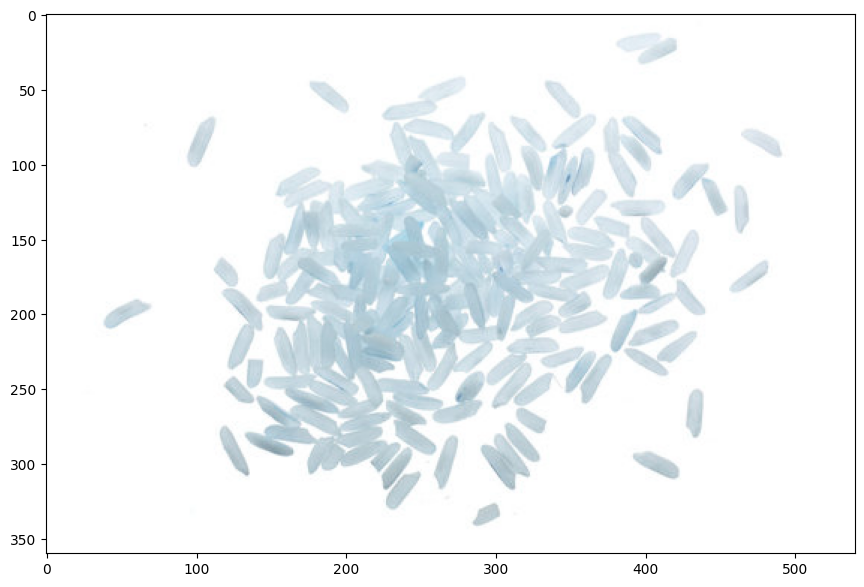

In [ ]:
#Reading Image
img = cv2.imread("/content/RICE.jpg")

#Using predefined show function for displaying the image
show(img,20,7)

### Converting Image into Grayscale and then Image Thresholding

The first step in Image Pre-processing is to convert the image into grayscale and to apply the threshold function the cv2.threshold()to separate pixels into the foreground, and the background areas.

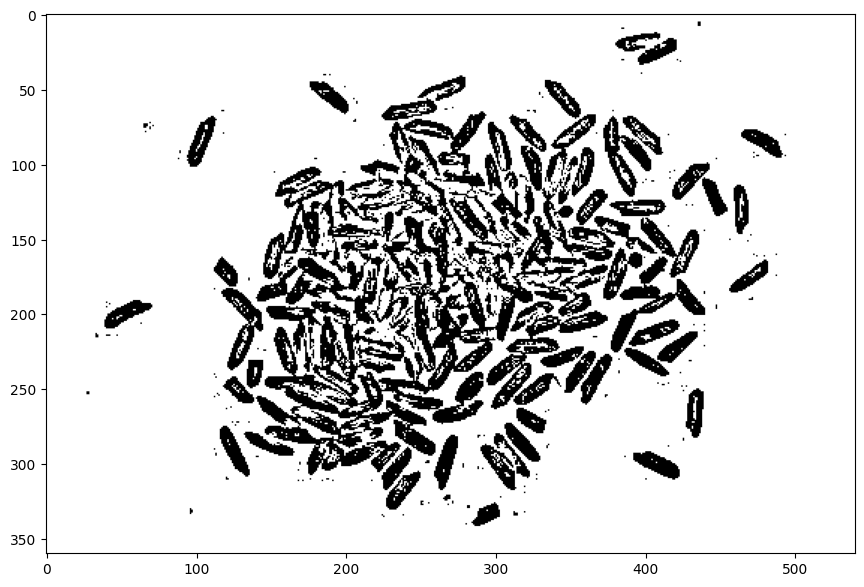

In [ ]:
# Convert BGR image to grayscale
grayscale_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply adaptive thresholding
adaptive_thresh_img = cv.adaptiveThreshold(grayscale_image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

# Show the thresholded image
show(adaptive_thresh_img)


### Noise Removal

To remove some noise from an image, the morphological function morphologyEx() can be Implemented.

This function can be used for several morphological operations, so there needed to add a parameter to specify which one can be taken.

Since the goal here is to remove the white ditorted reason the objectin the image.
Here, opening operation (erosion followed by dilation) is going to be in use.

In this case, we will use four iterations iterations=8 (to suppress larger noise areas we will use more iterations)

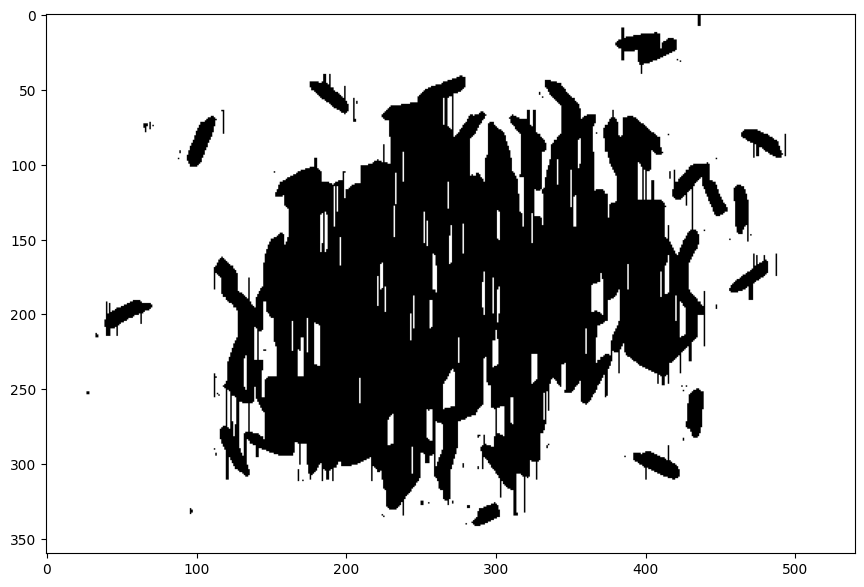

In [ ]:
# Noise removal
kernel = np.ones((3),np.uint8)
clear_image = cv.morphologyEx(adaptive_thresh_img,cv.MORPH_OPEN, kernel, iterations=8)

#Using show function earlier defined
show(clear_image)

Image pre-processing is done now, and its time to apply the Grain counting algorithm.

### Counting the labels

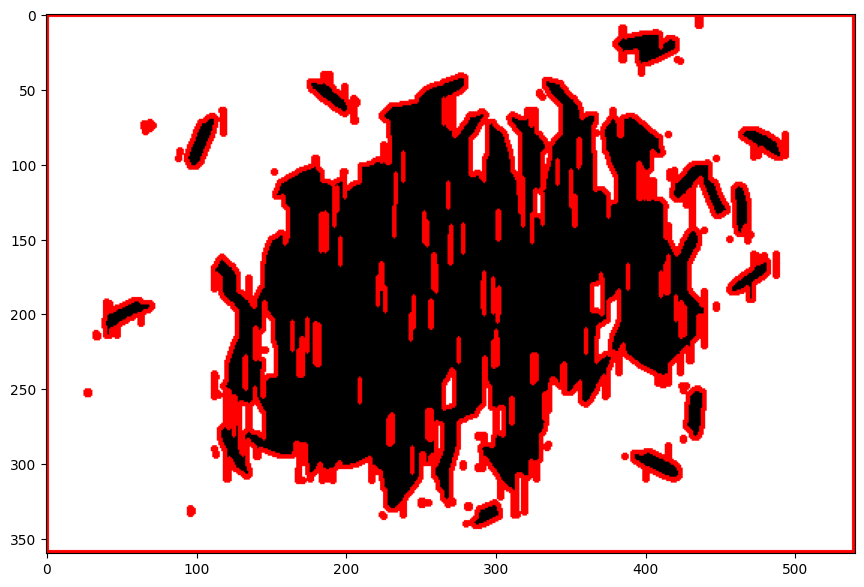

In [ ]:
contours, hierarchy = cv.findContours(clear_image,
                                          cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (255, 0, 0), 2)
show(output_contour)

## STEP 4 - Counting rice grains using Contours method

Applying Opencv Contour method for counting the total number of rice grains avilable in the image. \
Contours are defined as the line joining all the points along the boundary of an image that are having the same intensity.

In [ ]:
#Applying Countours method to get the count of rice grains
contours, hierarchy = cv.findContours(clear_image,
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 127


Number of detected contours are 30, It denotes, total number of rice grain in the Image.


## Output_Contour Image Analysis
Looking at the ouput_image after applying contours that, there are some rice grains that are touching each other.

And this situation making the Opencv Contour method to treat those images as collection or as 1 rice grain.

Well the amount of grains that are touching each other are very few but still there needed a fix for this.

### Time to fix the touching Rice grain problem!

## STEP 5 - Applying Watershed Algorithm
Fixing rice grains Touching problem with "**WaterShed Algorithm**" \
Watershed algorithm is based on extracting sure background and foreground and then using markers will make watershed run and detect the exact boundaries. This algorithm generally helps in detecting touching and overlapping objects in image.




In [ ]:
#To visualize the segmentation conveniently, There needed a colour-code the labelled regions using the color, thus I did it.


#Applying  distance_transform_edt to computes the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
dist_trans = ndimage.distance_transform_edt(clear_image)

#Applying peak_local_max function for getting coordinates of local peaks (maxima) in an image.
local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

#Aplying Watershed algorithm
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image) # separate merged corns

Rice_area = []
unique_labels = np.unique(labels)
for label in unique_labels:
    if label == 0:  # Exclude the background label
        continue
    object_mask = labels == label
    area = np.sum(object_mask)
    if area < 50: # filter out small contours
        continue
    eq_diameter = np.sqrt(4 * area / np.pi)

    # Convert the equivalent diameter to millimeters
    #pixel_size = 0.10  # assume each pixel is 0.014 mm (you can adjust this based on your image)
    eq_diameter_mm = eq_diameter * 0.09
    Rice_area.append(round(eq_diameter_mm,3))



## STEP 6 - Counting Total Grains and Broken grains using grains area

Number of Rice grains are : 24


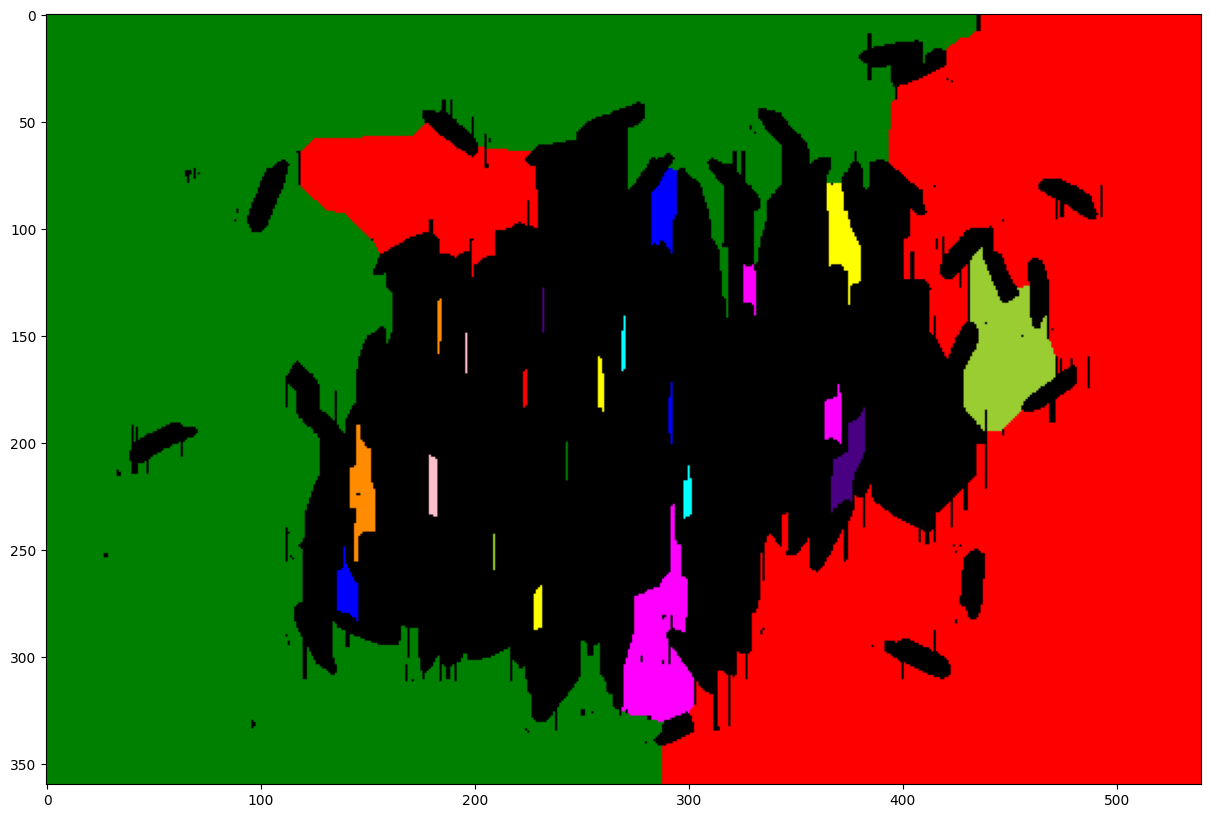

In [ ]:
#label2rgb function, specifying the background label with argument bg_label=0.
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice grains are : %d" % labels.max())

## Indivusal area of each rice grains

In [ ]:
print("\n\nTotal rice grain count as per contour is: ",len(Rice_area))

print("\n")

TotalRiceAreaSum=0
for count in range(0,len(Rice_area)):
    print("Area of the rice grain",count+1, "is:",Rice_area[count],"mm")



Total rice grain count as per contour is:  4


Area of the rice grain 1 is: 0.969 mm
Area of the rice grain 2 is: 0.78 mm
Area of the rice grain 3 is: 0.787 mm
Area of the rice grain 4 is: 0.739 mm


## Counting Broken Rice

After carefull analysis, I found that 800 is the threshold limit for classifing the broken rice grains from the Full rice grains.

Thus applying this limit on the contour to get the results.

In [ ]:

#Broken Rice count
BrokenRiceCount=0;
brokenRiceArea=0;
TotalRiceAreaSum=0
for rice in Rice_area:
    TotalRiceAreaSum+=rice
    if rice < 1.5:
        brokenRiceArea+=rice
        BrokenRiceCount+=1

print("\nRice Analysis :")

print("Total rice count is",len(Rice_area))
    #Average area of rice
print("Average area of rice is: ", round(TotalRiceAreaSum/len(Rice_area),3)," mm")

print("Broken Rice count is: ",BrokenRiceCount)

#Percentage of rice grain Broken
print("Percentage of rice grain broken is :",round((brokenRiceArea/len(Rice_area)+brokenRiceArea),3),"% percent")



Rice Analysis :
Total rice count is 4
Average area of rice is:  0.819  mm
Broken Rice count is:  4
Percentage of rice grain broken is : 4.094 % percent
